In [1]:
import sys

# Substitua 'caminho/para/sua/pasta' pelo caminho absoluto da pasta que você deseja adicionar
caminho_para_pasta = '/home/master/bin'

if caminho_para_pasta not in sys.path:
    sys.path.append(caminho_para_pasta)

import tri

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import os
import tri
import scipy as sci
from matplotlib.ticker import MultipleLocator

In [3]:
f_itens22='/home/master/Documentos/ITA/pesquisa/LPECT/DADOS/ENEM/microdados_enem_2022/DADOS/ITENS_PROVA_2022.csv'

df=pd.read_csv(f_itens22, encoding='latin',sep=';')

In [4]:
df.columns

Index(['CO_POSICAO', 'SG_AREA', 'CO_ITEM', 'TX_GABARITO', 'CO_HABILIDADE',
       'IN_ITEM_ABAN', 'TX_MOTIVO_ABAN', 'NU_PARAM_A', 'NU_PARAM_B',
       'NU_PARAM_C', 'TX_COR', 'CO_PROVA', 'TP_LINGUA', 'IN_ITEM_ADAPTADO'],
      dtype='object')

# 1) Questão 175 - Prova Azul

In [5]:
from IPython.display import Image, display

# URL da imagem
url = "https://s2-g1.glbimg.com/9aMKWG7TRkX_CzAw7Xa1jdhBX_Y=/0x0:1190x887/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2022/c/A/3DcPnMQC6h1d3HaneWDA/bilhao.jpg"

# Exibindo a imagem
display(Image(url=url,width=600))


In [6]:
df[(df['SG_AREA']=='MT') & (df['TX_COR']=='AZUL') & (df['CO_POSICAO']==175) & (df['TX_GABARITO']=='E')]

,CO_POSICAO,SG_AREA,CO_ITEM,TX_GABARITO,CO_HABILIDADE,IN_ITEM_ABAN,TX_MOTIVO_ABAN,NU_PARAM_A,NU_PARAM_B,NU_PARAM_C,TX_COR,CO_PROVA,TP_LINGUA,IN_ITEM_ADAPTADO
861,175,MT,60441,E,1,0,NaN,1.42701,-0.02398,0.11013,AZUL,1075,NaN,0
5011,175,MT,60441,E,1,0,NaN,1.42701,-0.02398,0.11013,AZUL,1183,NaN,0


In [7]:
questao1=df.iloc[861]
questao1

CO_POSICAO              175
SG_AREA                  MT
CO_ITEM               60441
TX_GABARITO               E
CO_HABILIDADE             1
IN_ITEM_ABAN              0
TX_MOTIVO_ABAN          NaN
NU_PARAM_A          1.42701
NU_PARAM_B         -0.02398
NU_PARAM_C          0.11013
TX_COR                 AZUL
CO_PROVA               1075
TP_LINGUA               NaN
IN_ITEM_ADAPTADO          0
Name: 861, dtype: object

In [8]:
habilidade=np.linspace(-5,5,100)

In [9]:
def PofQuestion(h,question):
    return tri.P(h,question.NU_PARAM_A,question.NU_PARAM_B,question.NU_PARAM_C)
    

Text(0, 0.5, 'Probabilidade de acerto')

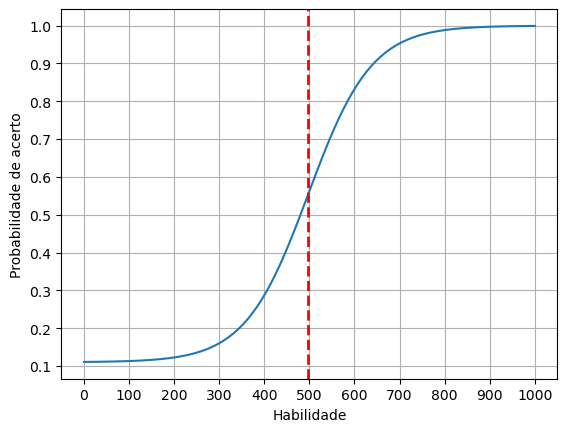

In [32]:
plt.plot( 500+100*habilidade, [PofQuestion(h,questao1) for h in habilidade] )
plt.axvline(x=500+100*questao1.NU_PARAM_B, color='red', linestyle='--', linewidth=2)
plt.gca().xaxis.set_major_locator(MultipleLocator(100))
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
plt.grid(axis='both')

plt.xlabel('Habilidade')
plt.ylabel('Probabilidade de acerto')


# 2) Dados dos alunos

In [11]:
f_microdados22='/home/master/Documentos/ITA/pesquisa/LPECT/DADOS/ENEM/microdados_enem_2022/DADOS/MICRODADOS_ENEM_2022.csv'
dfMicro22=pd.read_csv(f_microdados22, encoding='latin',sep=';')

In [33]:
dfMicro22.head(10);

In [34]:
dfMicro22.columns;

In [14]:
(dfMicro22['NU_NOTA_MT']<(500+100*questao1.NU_PARAM_B)).describe()

count     3476105
unique          2
top         False
freq      2526724
Name: NU_NOTA_MT, dtype: object

In [38]:
above=2526724/3476105

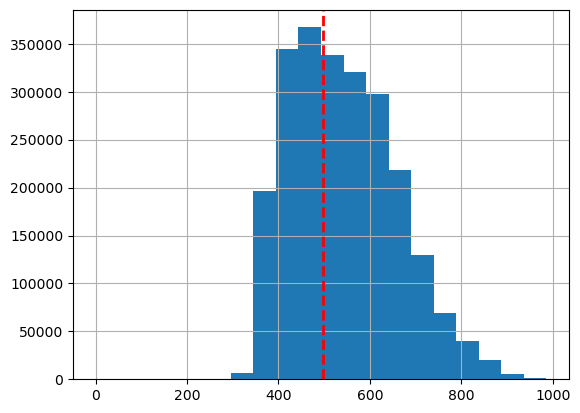

In [35]:
dfMicro22['NU_NOTA_MT'].hist(bins=20)
plt.axvline(x=500+100*questao1.NU_PARAM_B, color='red', linestyle='--', linewidth=2)

#2 Pessoas abaixo desse nível de habilidade:


In [43]:
1-above

0.27311631840810335

In [17]:
#dfMicro22['CO_PROVA_CN']

In [18]:
provasAzuis=dfMicro22[dfMicro22['CO_PROVA_MT']==1075]

<Axes: >

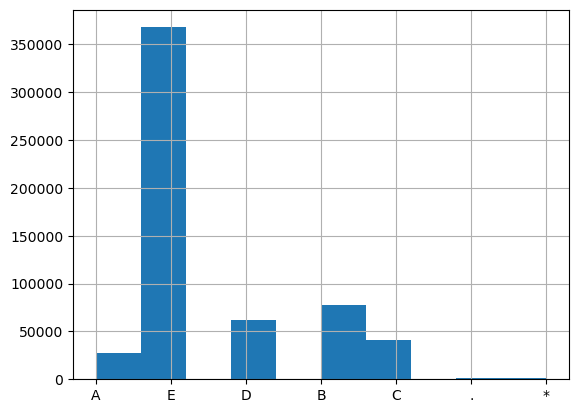

In [19]:
provasAzuis['TX_RESPOSTAS_MT'].dropna().apply(lambda s: s[175-91-45] ).hist()

In [20]:
provasAzuis['TX_RESPOSTAS_MT'].dropna().apply(lambda s: s[175-91-45] ).describe()

count     578780
unique         7
top            E
freq      367928
Name: TX_RESPOSTAS_MT, dtype: object

In [41]:
tAcerto=367928/578780
tErro=1-tAcerto
tErro

0.3643042261308269